In [1]:
import pandas as pd

Charger et visualiser les données

In [2]:
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


Étape 2 : Visualiser et comprendre les données
L’objectif ici est de :

Comprendre la distribution des variables

Voir s’il y a des relations entre les variables et le prix

Vérifier la corrélation avec la variable cible Price

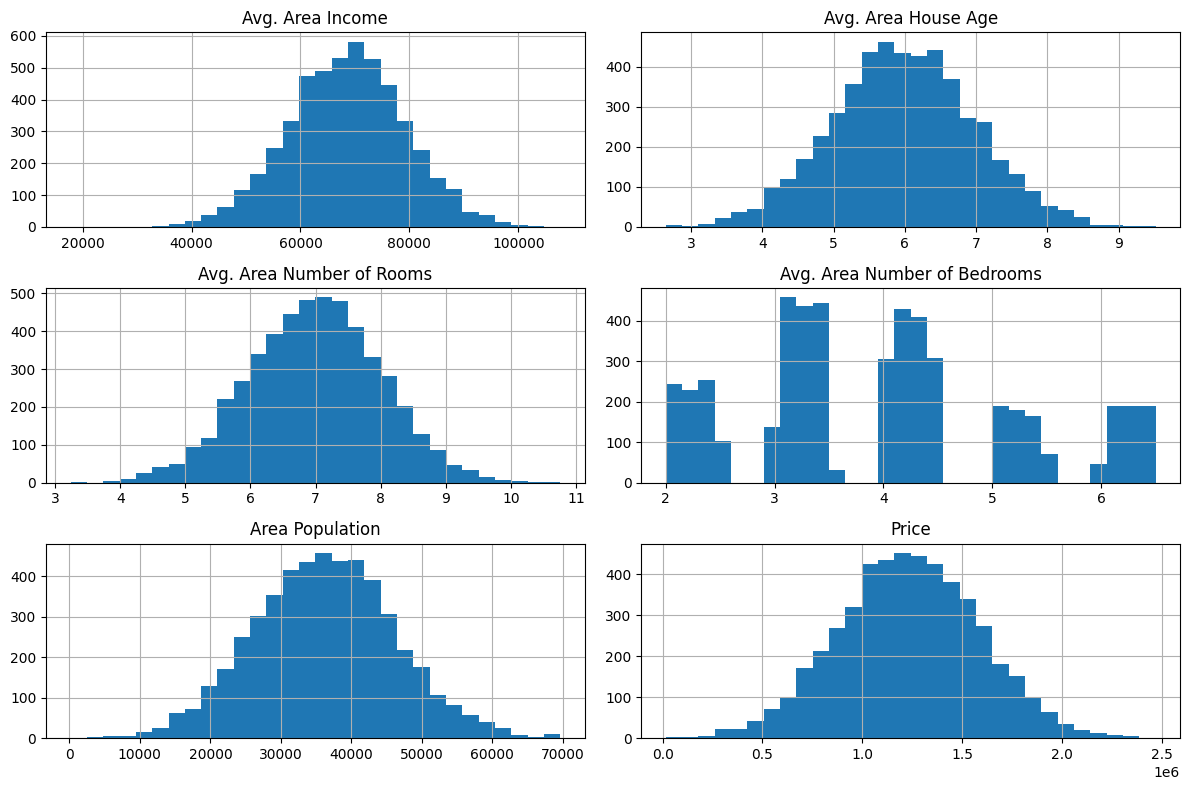

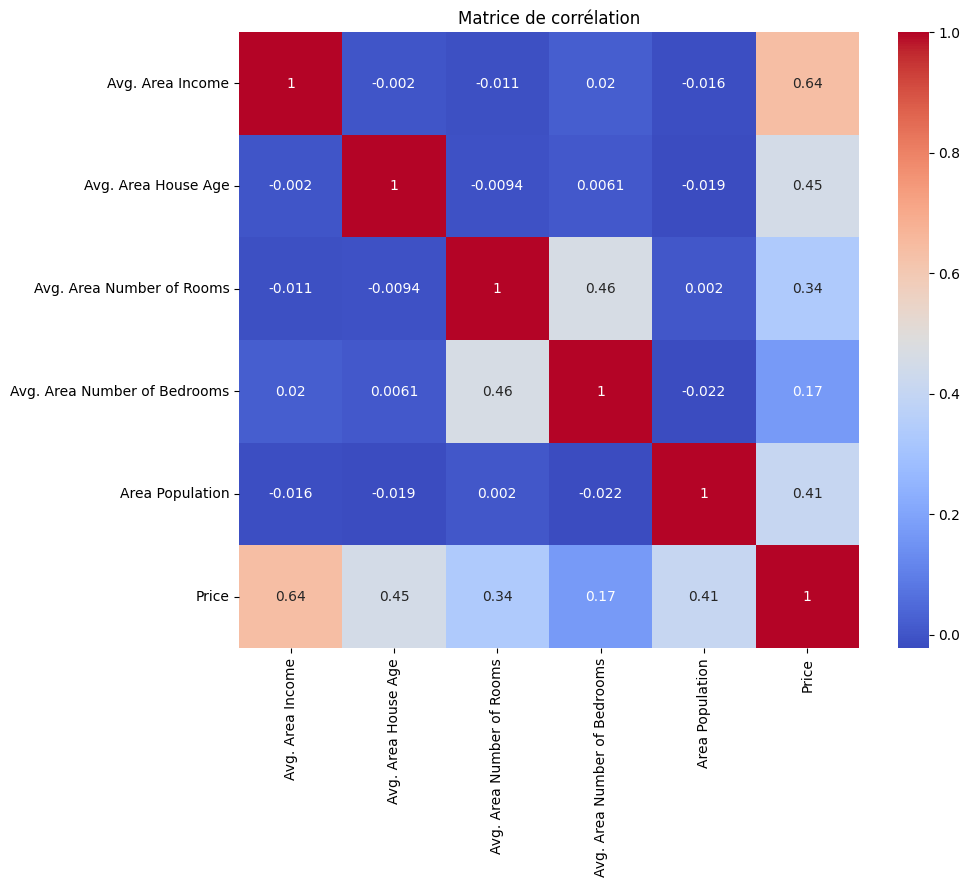

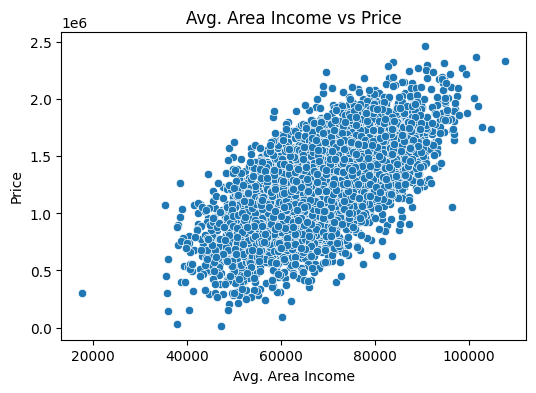

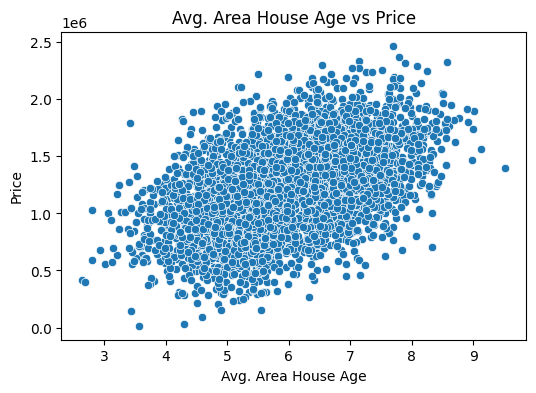

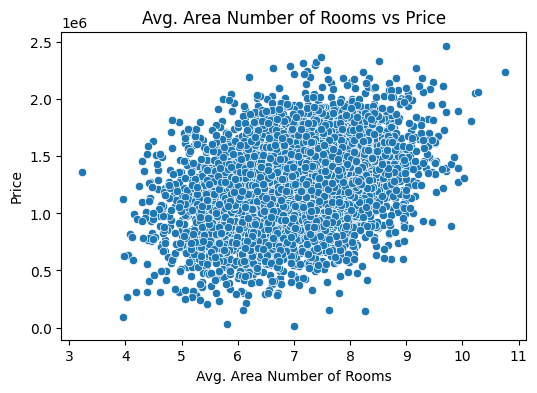

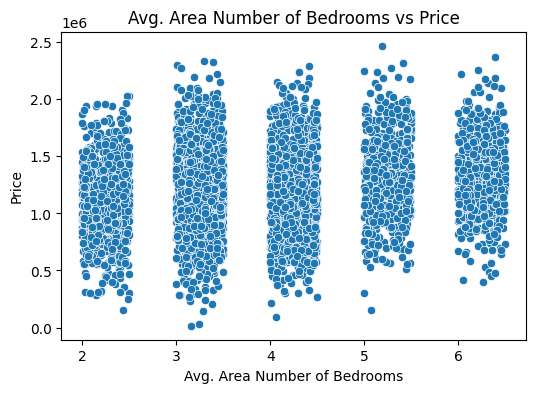

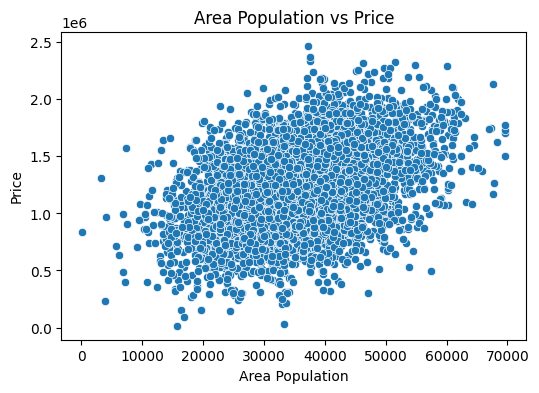

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df.drop("Address", axis=1)
# 1. Histogrammes des variables numériques
df.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

# 2. Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

# 3. Nuage de points entre les features et le prix
features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
            'Avg. Area Number of Bedrooms', 'Area Population']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['Price'])
    plt.title(f'{feature} vs Price')
    plt.show()


Étape 3 : Prétraitement des données

Objectif :

Séparer les features (X) et la cible (y)

Diviser les données en données d'entraînement et données de test

In [6]:
from sklearn.model_selection import train_test_split

# 1. Séparer les features et la cible
X = df.drop('Price', axis=1)
y = df['Price']

# 2. Diviser en données d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4000, 5)
X_test shape: (1000, 5)
y_train shape: (4000,)
y_test shape: (1000,)


Étape 4 : Entraîner le modèle de Régression Linéaire

Objectif :

Créer un modèle de régression linéaire et l’entraîner avec les données d’apprentissage (X_train, y_train)

--------------------------------------------------------

L’intercept (la constante dans l’équation)

Les coefficients de chaque variable (l’impact de chaque feature sur le prix)

Exemple d’interprétation :

Si le coefficient de Avg. Area Income = 20, cela signifie que quand le revenu augmente de 1 dollar, le prix moyen de la maison augmente de 20 dollars (toutes choses égales par ailleurs).


In [7]:
from sklearn.linear_model import LinearRegression

# 1. Créer le modèle
model = LinearRegression()

# 2. L'entraîner avec les données
model.fit(X_train, y_train)

# 3. Afficher les coefficients du modèle
print("Intercept (b0) :", model.intercept_)
print("Coefficients (b1, b2, ...) :", model.coef_)

# 4. Afficher les noms des colonnes avec les coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coeff_df)


Intercept (b0) : -2635072.900933357
Coefficients (b1, b2, ...) : [2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]
                                Coefficient
Avg. Area Income                  21.652206
Avg. Area House Age           164666.480722
Avg. Area Number of Rooms     119624.012232
Avg. Area Number of Bedrooms    2440.377611
Area Population                   15.270313


------------------------------------------------------------------------------

Étape 5 : Faire des prédictions et évaluer le modèle
Objectif :
Utiliser notre modèle pour faire des prédictions sur les données de test

Comparer les prédictions avec les valeurs réelles

Évaluer la précision du modèle

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Prédire les prix avec les données de test
y_pred = model.predict(X_test)

# 2. Évaluer les performances
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE) :", mae)
print("Mean Squared Error (MSE) :", mse)
print("Root Mean Squared Error (RMSE) :", rmse)
print("R² Score :", r2)

Mean Absolute Error (MAE) : 80879.09723489822
Mean Squared Error (MSE) : 10089009300.894522
Root Mean Squared Error (RMSE) : 100444.06055558746
R² Score : 0.9179971706834288


-------------------------------------------------------------------

Étape 6 : Visualiser les résultats

Objectif :

Comparer visuellement les valeurs réelles et les valeurs prédites

Voir la distribution des erreurs

--------------------------------------------------------
Prédictions vs Réel

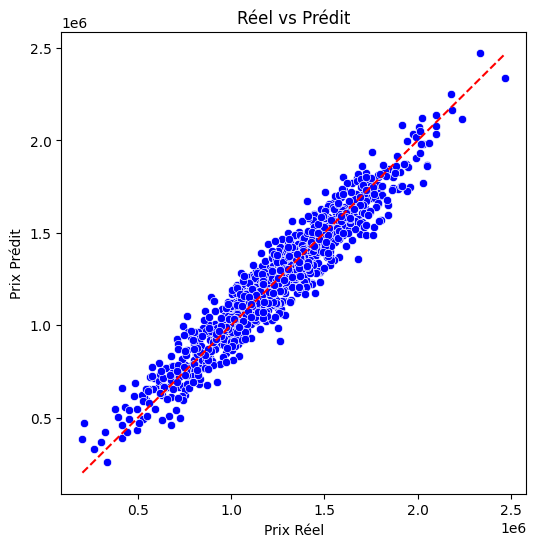

In [9]:
# Graphique : y_test vs y_pred
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # ligne parfaite
plt.xlabel("Prix Réel")
plt.ylabel("Prix Prédit")
plt.title("Réel vs Prédit")
plt.show()


----------------------------------------------------
Distribution des erreurs

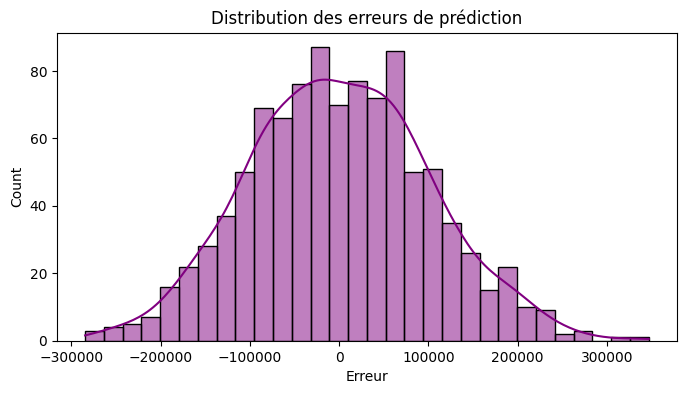

In [10]:
# Erreurs = différence entre vrai et prédit
errors = y_test - y_pred

# Histogramme des erreurs
plt.figure(figsize=(8, 4))
sns.histplot(errors, bins=30, kde=True, color='purple')
plt.title("Distribution des erreurs de prédiction")
plt.xlabel("Erreur")
plt.show()


Test de modele : entrer des valeurs et s'avoir la prediction

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# 1. Définition des champs
income_w   = widgets.FloatText(value=0.0, description="Income ($):")
age_w      = widgets.FloatText(value=0.0,    description="House Age (yrs):")
rooms_w    = widgets.FloatText(value=0.0,    description="Rooms:")
bedrooms_w = widgets.FloatText(value=0.0,    description="Bedrooms:")
pop_w      = widgets.IntText(  value=0,  description="Population:")

# 2. Bouton et zone de sortie
button = widgets.Button(description="Predict")
out    = widgets.Output()

# 3. Callback : on encapsule le print dans 'out'
def on_button_clicked(b):
    with out:
        clear_output()  # efface l'ancienne sortie
        X_new = [[
            income_w.value,
            age_w.value,
            rooms_w.value,
            bedrooms_w.value,
            pop_w.value
        ]]
        # prédiction
        prix = model.predict(X_new)[0]
        print(f" Estimated Price: ${prix:,.2f}")

button.on_click(on_button_clicked)

# 4. Affichage
display(
    income_w, age_w, rooms_w,
    bedrooms_w, pop_w,
    button, out
)


FloatText(value=0.0, description='Income ($):')

FloatText(value=0.0, description='House Age (yrs):')

FloatText(value=0.0, description='Rooms:')

FloatText(value=0.0, description='Bedrooms:')

IntText(value=0, description='Population:')

Button(description='Predict', style=ButtonStyle())

Output()